# Importando as Bibliotecas

In [2]:
import pandas as pd
import seaborn as sns

# Importando os Dados

In [3]:
tips = pd.read_csv('../data/tips.csv')

In [4]:
tips.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Analise 1 - Valor da Conta e Gorjeta

In [5]:
tips.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

<Axes: xlabel='total_bill', ylabel='tip'>

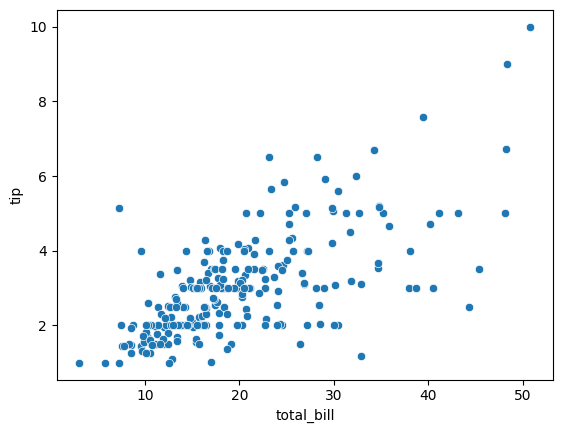

In [6]:
sns.scatterplot(x='total_bill',y='tip',data=tips)

In [7]:
tips['percent'] = round((tips.tip/tips.total_bill)*100,2)

In [8]:
tips.head()

,total_bill,tip,dessert,day,time,size,percent
0,16.99,1.01,No,Sun,Dinner,2,5.94
1,10.34,1.66,No,Sun,Dinner,3,16.05
2,21.01,3.50,No,Sun,Dinner,3,16.66
3,23.68,3.31,No,Sun,Dinner,2,13.98
4,24.59,3.61,No,Sun,Dinner,4,14.68


<Axes: xlabel='total_bill', ylabel='percent'>

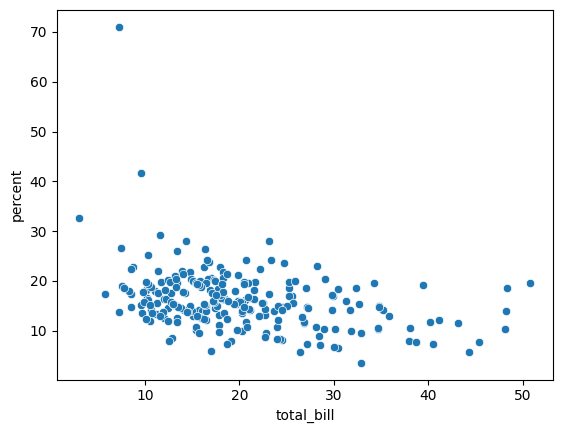

In [9]:
sns.scatterplot(x='total_bill',y='percent',data=tips)

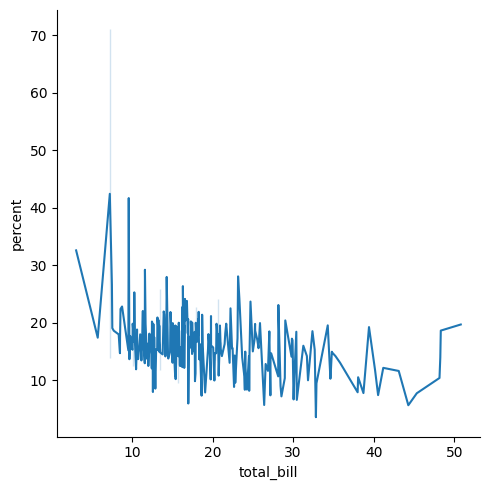

In [10]:
sns.relplot(x='total_bill',y='percent',data=tips, kind='line')

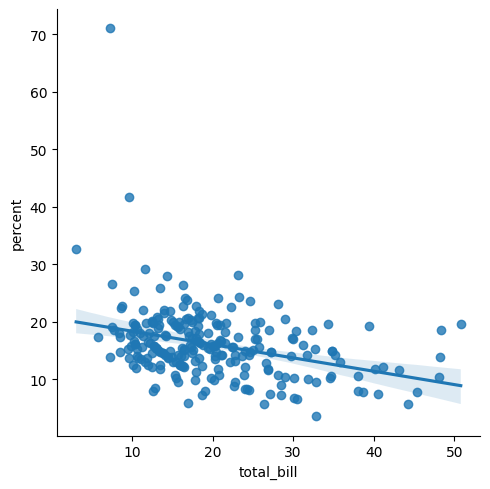

In [11]:
sns.lmplot(x='total_bill',y='percent',data=tips)

# Analise 2 - Sobremesa e Gorjeta

In [12]:
tips.head()

,total_bill,tip,dessert,day,time,size,percent
0,16.99,1.01,No,Sun,Dinner,2,5.94
1,10.34,1.66,No,Sun,Dinner,3,16.05
2,21.01,3.50,No,Sun,Dinner,3,16.66
3,23.68,3.31,No,Sun,Dinner,2,13.98
4,24.59,3.61,No,Sun,Dinner,4,14.68


In [14]:
tips[tips.dessert == 'Yes'].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_bill,93.0,20.756344,9.832154,3.07,13.42,17.92,26.86,50.81
tip,93.0,3.008710,1.401468,1.00,2.00,3.00,3.68,10.00
size,93.0,2.408602,0.810751,1.00,2.00,2.00,3.00,5.00
percent,93.0,16.319140,8.511748,3.56,10.68,15.38,19.51,71.03


In [15]:
tips[tips.dessert == 'No'].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_bill,151.0,19.188278,8.255582,7.25,13.325,17.59,22.755,48.33
tip,151.0,2.991854,1.377190,1.00,2.000,2.74,3.505,9.00
size,151.0,2.668874,1.017984,1.00,2.000,2.00,3.000,6.00
percent,151.0,15.932318,3.990701,5.68,13.690,15.56,18.500,29.20


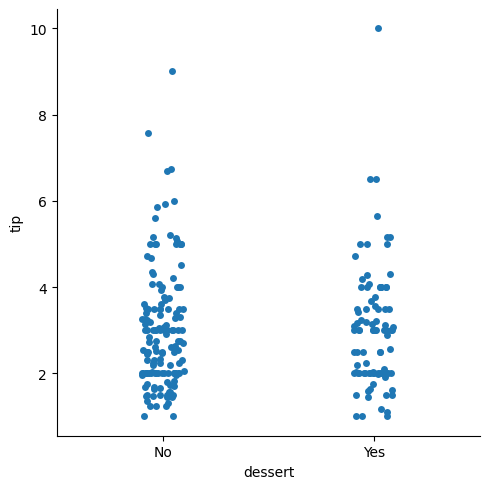

In [23]:
sns.catplot(x='dessert',y='tip',data=tips)

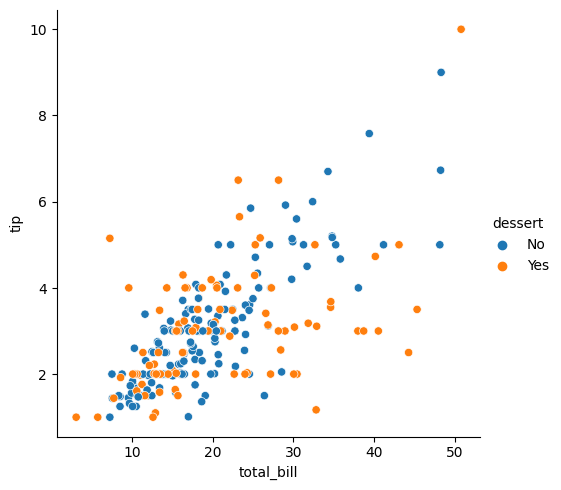

In [22]:
sns.relplot(x='total_bill', y='tip', data=tips, hue='dessert')

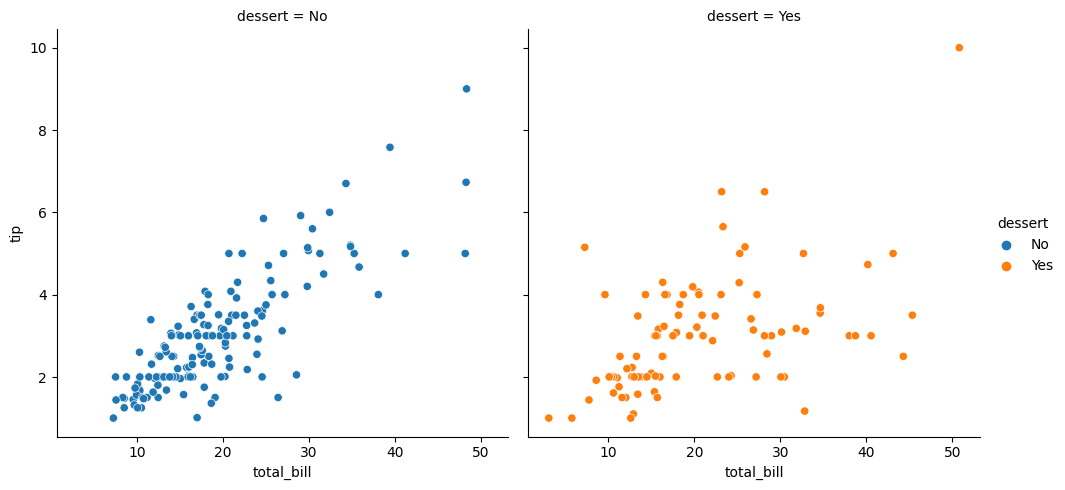

In [21]:
sns.relplot(x='total_bill', y='tip', data=tips, hue='dessert', col='dessert')

In [25]:
tips.corr()

C:\Users\g_fma\AppData\Local\Temp\ipykernel_1104\3825555837.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tips.corr()


,total_bill,tip,size,percent
total_bill,1.000000,0.675734,0.598315,-0.338629
tip,0.675734,1.000000,0.489299,0.342361
size,0.598315,0.489299,1.000000,-0.142844
percent,-0.338629,0.342361,-0.142844,1.000000


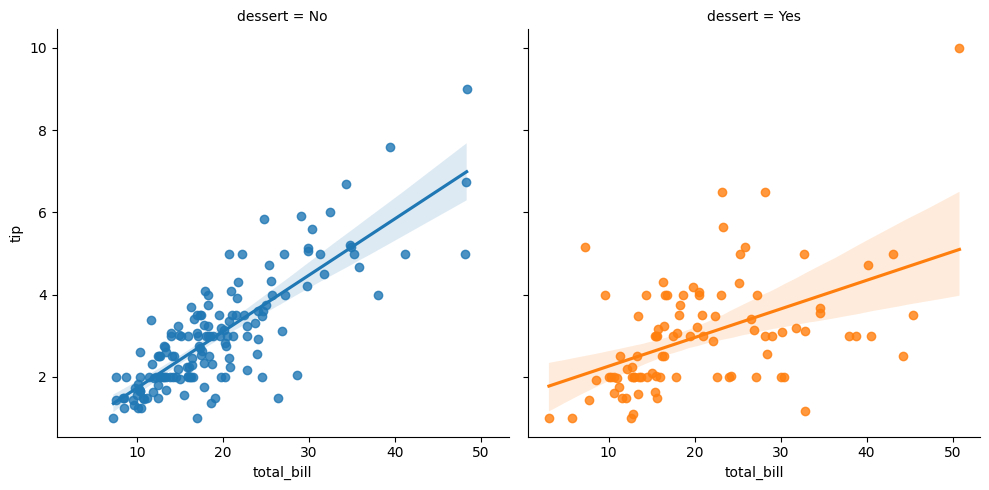

In [26]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='dessert', col='dessert')

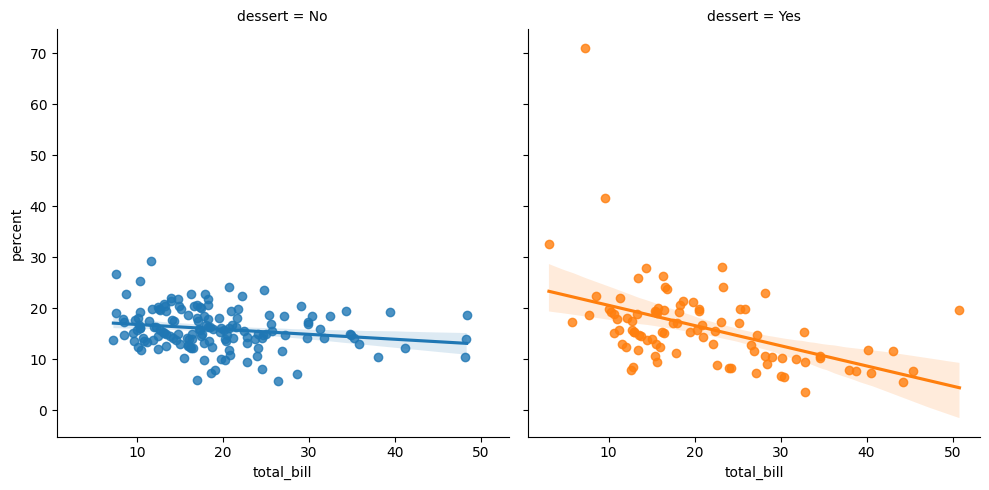

In [27]:
sns.lmplot(x='total_bill', y='percent', data=tips, hue='dessert', col='dessert')

# Teste de Hipotese

Hipoteses

**H<sup>0<sup>** -> A distribuição da taxa da gorjeta é igual para ambos os grupos

**H<sup>1<sup>** -> A distribuição da taxa da gorjeta NÃO é igual para ambos os grupos

In [32]:
from scipy.stats import ranksums

In [29]:
dessert_yes = tips.percent[tips.dessert == 'Yes']
dessert_no = tips.percent[tips.dessert == 'No']

In [30]:
dessert_no

0       5.94
1      16.05
2      16.66
3      13.98
4      14.68
       ...  
235    12.41
238    13.03
239    20.39
242     9.82
243    15.97
Name: percent, Length: 151, dtype: float64

In [33]:
ranksums(dessert_yes, dessert_no)

RanksumsResult(statistic=-0.5845504113520769, pvalue=0.558850059321255)

**H<sup>0<sup>** -> A distribuição da taxa da gorjeta é igual para ambos os grupos

# Analise 3 - Dias da Semana

In [36]:
tips.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

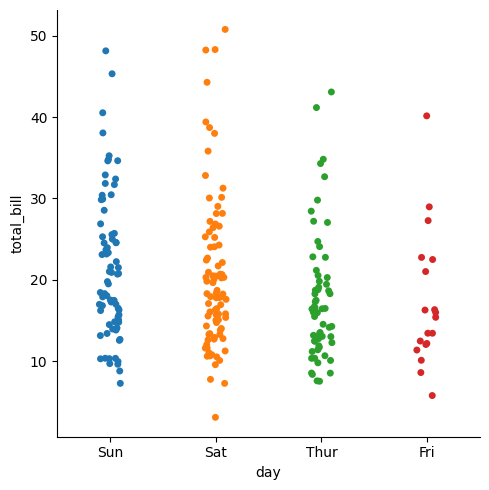

In [38]:
sns.catplot(x='day', y='total_bill', data=tips, hue='day')

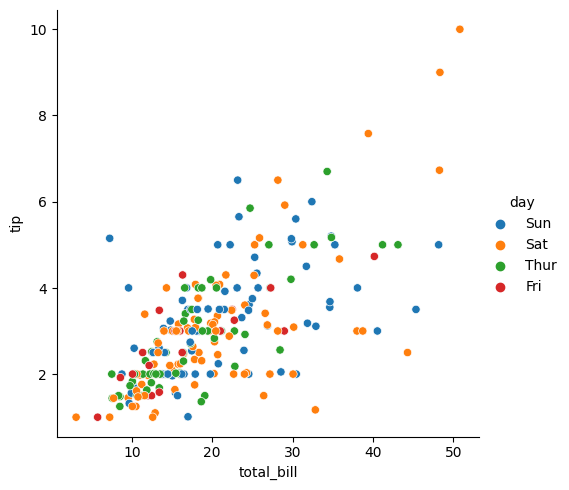

In [40]:
sns.relplot(x='total_bill', y='tip', data=tips, hue='day')

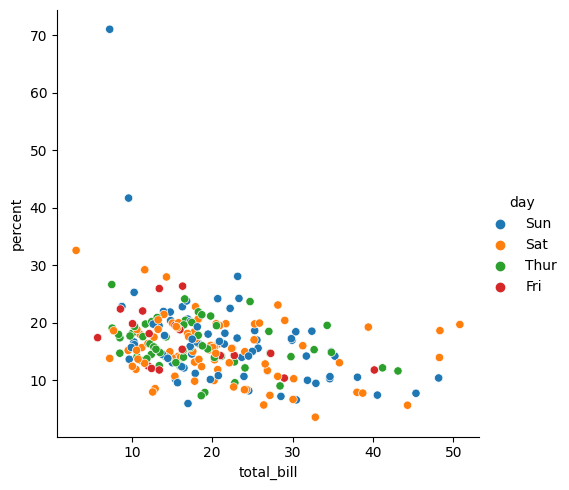

In [41]:
sns.relplot(x='total_bill', y='percent', data=tips, hue='day')

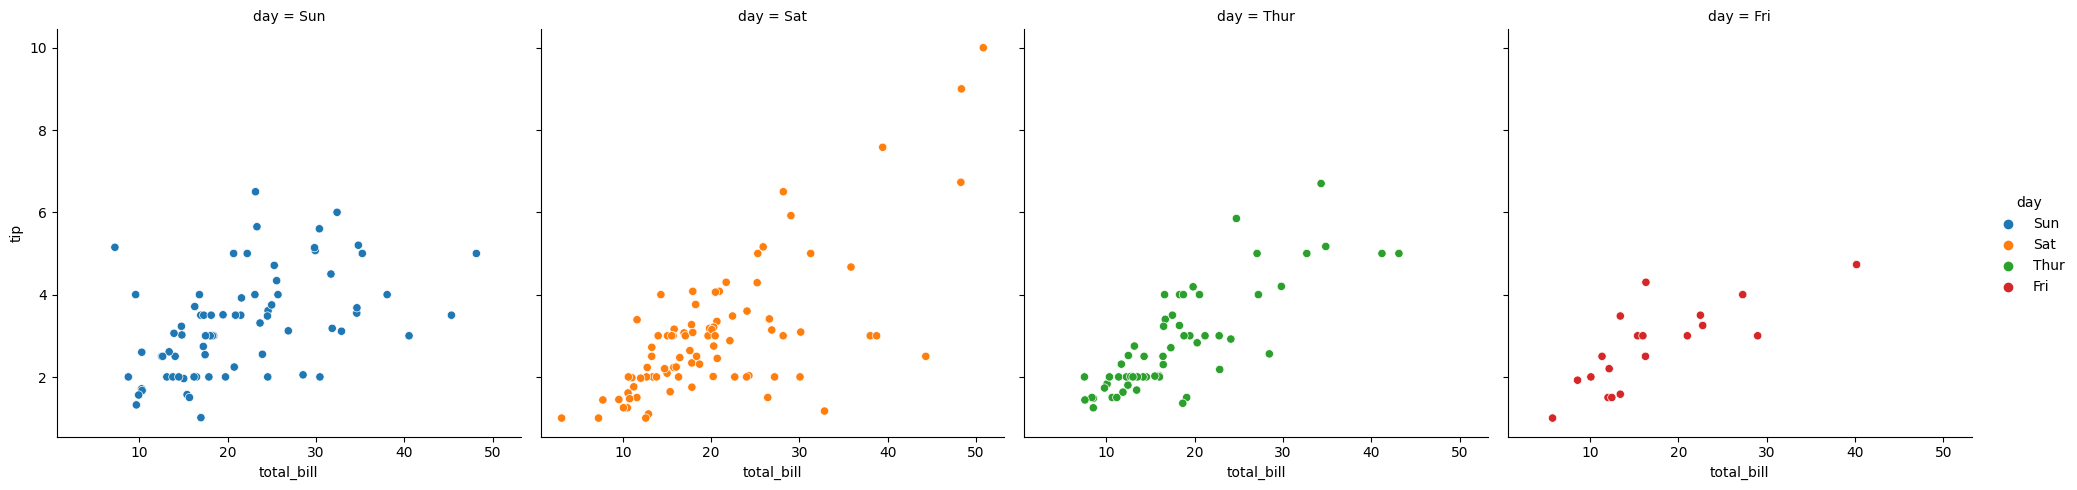

In [42]:
sns.relplot(x='total_bill', y='tip', data=tips, hue='day', col='day')

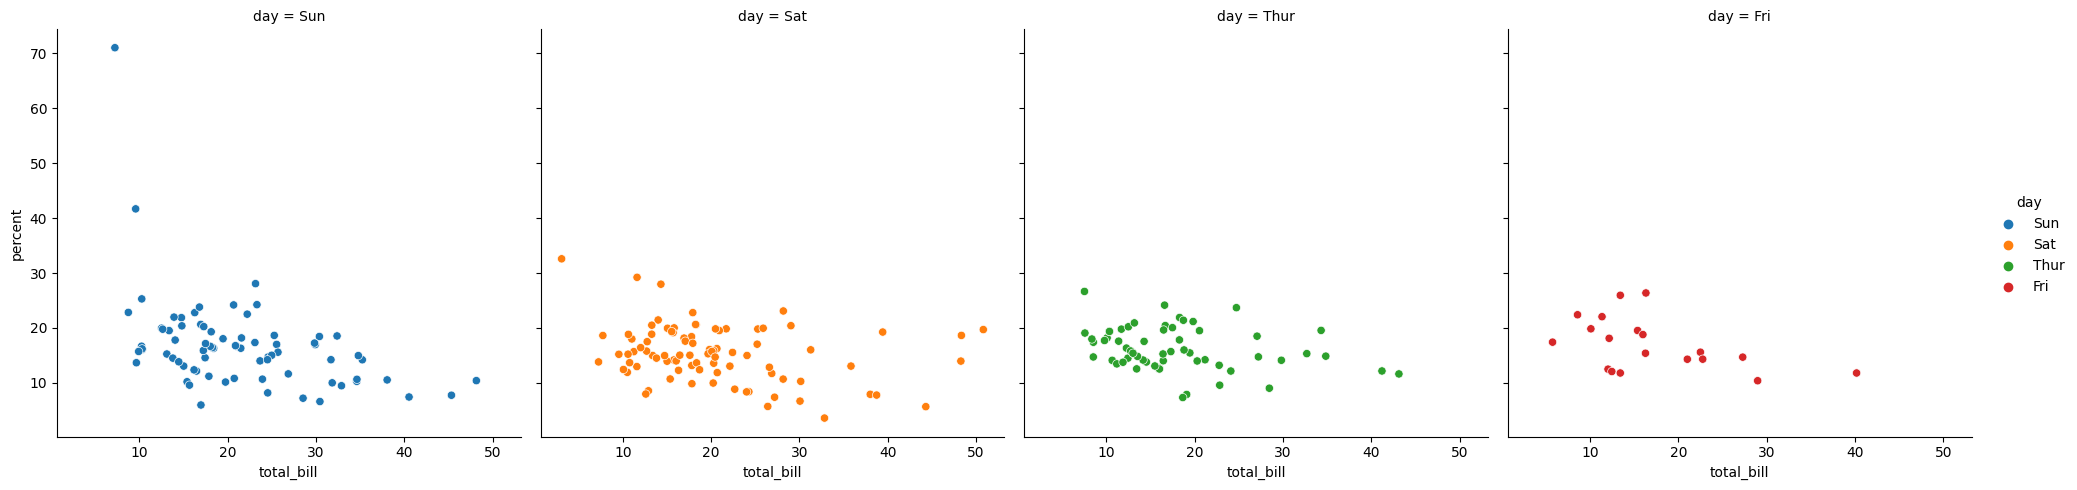

In [43]:
sns.relplot(x='total_bill', y='percent', data=tips, hue='day', col='day')

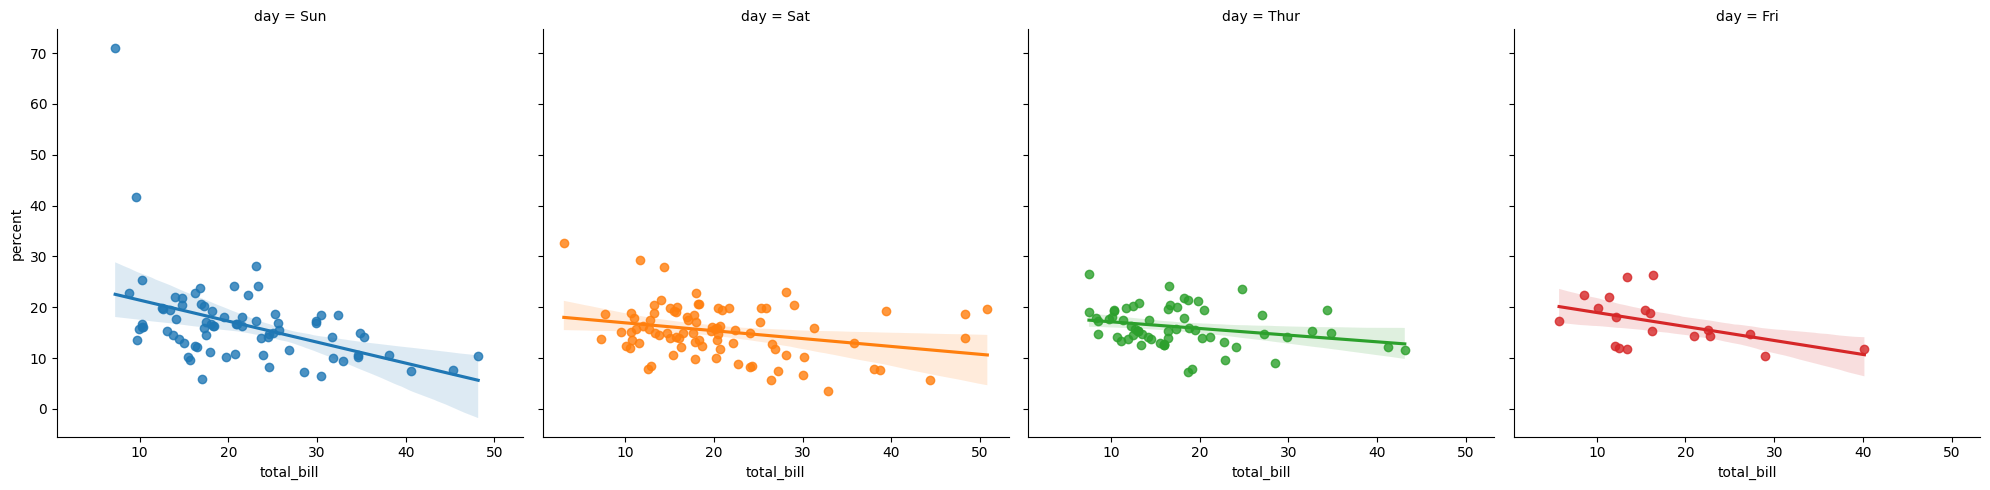

In [44]:
sns.lmplot(x='total_bill', y='percent', data=tips, hue='day', col='day')

In [45]:
tips.tip.mean()

2.99827868852459

In [46]:
tips.groupby(['day']).mean()

C:\Users\g_fma\AppData\Local\Temp\ipykernel_1104\3398959585.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tips.groupby(['day']).mean()


,total_bill,tip,size,percent
day,,,,
Fri,17.151579,2.734737,2.105263,16.991579
Sat,20.441379,2.993103,2.517241,15.314598
Sun,21.410000,3.255132,2.842105,16.689605
Thur,17.682742,2.771452,2.451613,16.126452


# Teste de Hipotese

Hipoteses

**H<sup>0<sup>** -> A distribuição do valor da conta é igual no sábado e no domingo

**H<sup>1<sup>** -> A distribuição do valor da conta NÃO é igual no sábado e no domingo

In [47]:
bill_sun = tips.total_bill[tips.day == 'Sun']
bill_sat = tips.total_bill[tips.day == 'Sat']

In [49]:
ranksums(bill_sun,bill_sat)

RanksumsResult(statistic=0.9198084864360142, pvalue=0.3576728477868443)

**H<sup>0<sup>** -> A distribuição do valor da conta é igual no sábado e no domingo

# Analise 4 - Hora do Dia

In [50]:
tips['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

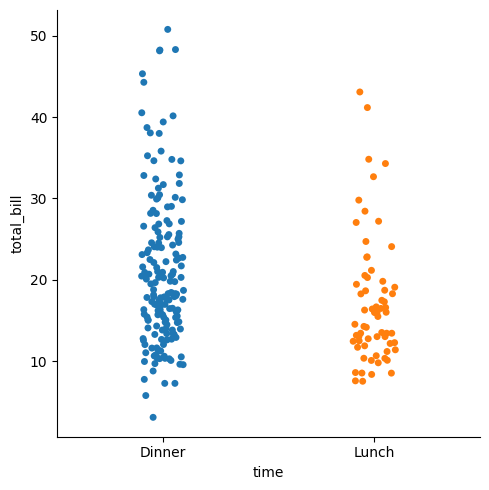

In [52]:
sns.catplot(x='time', y='total_bill', data=tips, hue='time')

<Axes: xlabel='time', ylabel='total_bill'>

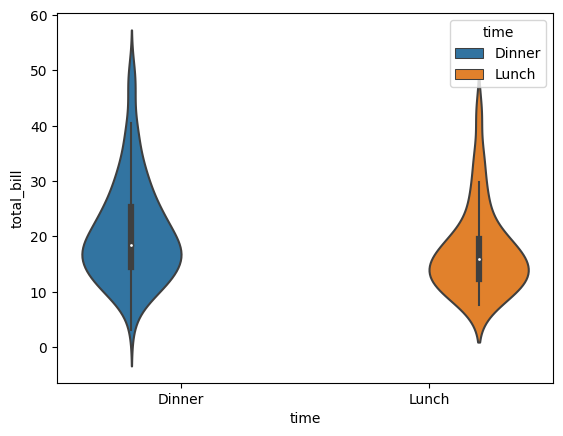

In [53]:
sns.violinplot(x='time', y='total_bill', data=tips, hue='time')

<Axes: xlabel='time', ylabel='total_bill'>

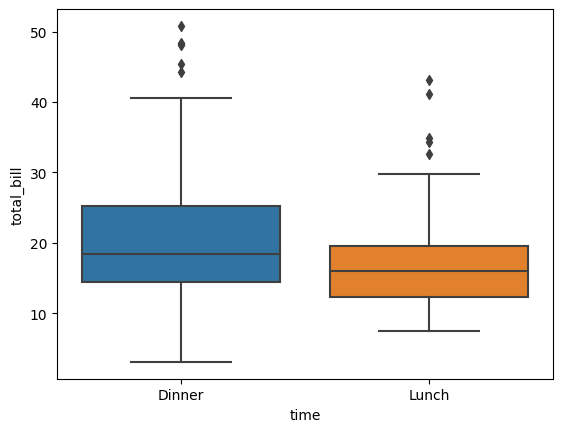

In [55]:
sns.boxplot(x='time', y='total_bill', data=tips)

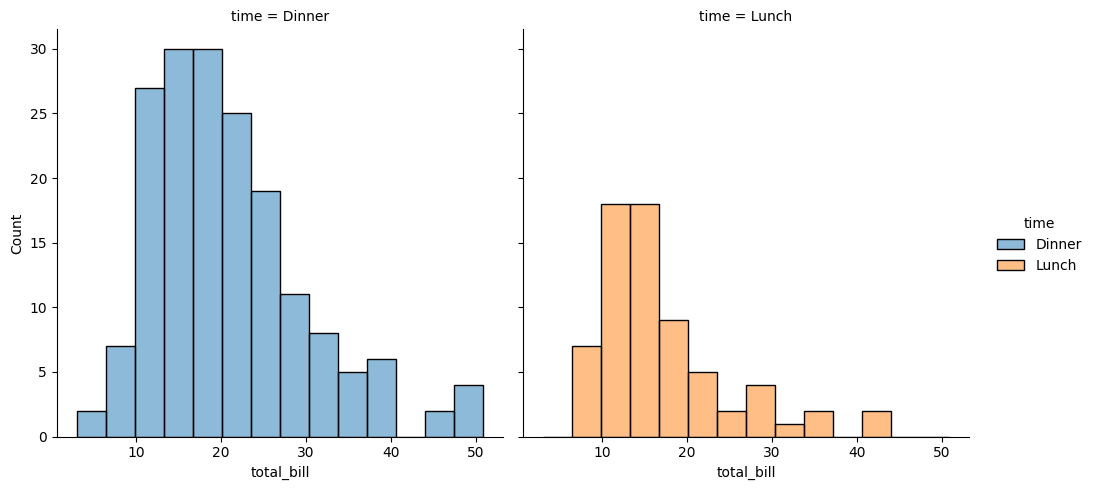

In [63]:
sns.displot(x='total_bill', data=tips, hue='time', col='time')

In [65]:
tips.groupby(['time']).mean()

C:\Users\g_fma\AppData\Local\Temp\ipykernel_1104\793139560.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tips.groupby(['time']).mean()


,total_bill,tip,size,percent
time,,,,
Dinner,20.797159,3.102670,2.630682,15.951477
Lunch,17.168676,2.728088,2.411765,16.411765


# Teste de Hipotese

Hipoteses

**H<sup>0<sup>** -> A distribuição do valor da conta é igual no jantar e almoço

**H<sup>1<sup>** -> A distribuição do valor da conta NÃO é igual no jantar e almoço

In [66]:
bill_lun = tips.total_bill[tips.time == 'Lunch']
bill_din = tips.total_bill[tips.time == 'Dinner']

In [68]:
ranksums(bill_din,bill_lun)

RanksumsResult(statistic=3.2438872807262955, pvalue=0.0011791039723641672)

**H<sup>1<sup>** -> A distribuição do valor da conta NÃO é igual no jantar e almoço

In [75]:
percent_lun = tips.percent[tips.time == 'Lunch']
percent_din = tips.percent[tips.time == 'Dinner']

In [76]:
ranksums(percent_lun,percent_din)

RanksumsResult(statistic=1.204699018193021, pvalue=0.22831951519679017)

**H<sup>0<sup>** -> A distribuição da taxa da gorjeta é igual no jantar e almoço